#### EMOTION DETECTION DATASET

## 1.0 DATA SOURCES
The Emotion Detection portion of the dataset focuses on identifying underlying emotional states conveyed in the text.

Emotions are labeled with categories such as:
- Joy, Anger, Sadness, Fear, Love, Surprise

This enables deeper understanding of user sentiment beyond polarity, useful for tasks like mental health monitoring, customer experience, and social media analysis.

You can access the dataset via the following link: [Emotion Analysis Dataset on Kaggle](https://www.kaggle.com/datasets/kushagra3204/sentiment-and-emotion-analysis-dataset/data)

## 1.1 TOOLS AND ENVIRONMENT
Python Notebook (Jupyter Notebook)

## 1.2 MODELLING APPROACH
- Model Built with Logistic Regression (LR)

- Model Built with Random Forest Classifier (RF)

- Model Built with Decision Tree Classifier (DT)

- Model Built with Extreme Gradient Boosting (XGB)

- Model Built with Long Short-Term Memory Network (LSTM)

- Model Built with Gated Recurrent Unit Network (GRU)

- Model Built with Convolutional Neural Network (CNN)

In [32]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [33]:
!pip install textblob

In [34]:
pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [35]:

# Standard libraries
import os
import random
import shutil
import warnings
import import_ipynb
import sys

# Data processing libraries
import numpy as np
import pandas as pd
import joblib

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import scipy.stats as stats
import pyforest
from wordcloud import WordCloud
from textblob import TextBlob

# Terminal formatting
from colorama import Fore, Style
from termcolor import colored

# Scikit-learn utilities
from sklearn.model_selection import (
    train_test_split, RepeatedStratifiedKFold, StratifiedKFold, KFold,
    cross_val_predict, cross_val_score, cross_validate, GridSearchCV
)
from sklearn.preprocessing import (
    StandardScaler, PolynomialFeatures, OneHotEncoder, PowerTransformer,
    MinMaxScaler, LabelEncoder, RobustScaler, label_binarize
)
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, r2_score,
    mean_absolute_error, mean_squared_error, classification_report,
    confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc,
    make_scorer, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay
)
from sklearn.linear_model import (
    LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVR, SVC
from sklearn.ensemble import (
    RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor,
    ExtraTreesRegressor, AdaBoostClassifier
)
from sklearn.feature_selection import (
    SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
)
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.datasets import make_classification
from sklearn.feature_extraction.text import TfidfVectorizer

# Imbalanced data handling
from imblearn.over_sampling import SMOTE

# Optimization and tuning
from skopt import BayesSearchCV
from keras_tuner import BayesianOptimization
from keras_tuner.tuners import BayesianOptimization as KerasBayesianOptimization

# XGBoost
from xgboost import XGBClassifier, XGBRegressor, plot_importance

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    LSTM, GRU, Conv1D, GlobalMaxPooling1D, Embedding, Dense, Dropout
)
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [36]:
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Configurations
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option("display.max_columns", 200)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Initialize plotly and cufflinks
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


In [37]:
import sys
sys.path.append('../functions')

from model_function import *

In [38]:
import importlib
import model_function  # first, import the module

importlib.reload(model_function)  # then reload it

<module 'model_function' from '/Users/madeniji/Documents/Pycharm_Dev/msc_sentemotion_analysis/model_src_code/run_scripts/../functions/model_function.py'>

In [39]:
data_path = '../dataset/combined_emotion.csv'

In [40]:
df_emo = pd.read_csv(data_path)

In [41]:
print(len(df_emo))
print(len(df_emo.columns))

422746
2


In [42]:
#Check for top 5 datas using .head()
df_emo.head()

sentence  \
0                                                                                                                                                                                               i just feel really helpless and heavy hearted   
1  ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listless which is never really a good thing   
2                                                                                                                                                                             i gave up my internship with the dmrg and am feeling distraught   
3                                                                                                                                                                                                                  i dont know i feel so lost   
4              i am a kindergarten teacher and i am thoroughly weary of my job after having taken the university entrance exam i suffered from anxiety for weeks as i did not want to carry on with my work studies were the only alternative   

  emotion  
0    fear  
1     sad  
2    fear  
3     sad  
4    fear

In [43]:
#Check for last 5 datas using .tail()
df_emo.sample(5)

sentence  \
52840                                                                                                                                            i feel like i ve been convinced by some indian guys to go horseback riding with the dalton brothers in cappadocia   
338919  i love the insular feel of island living how genuinely weird islanders are it seems to be a prerequisite that you have to be a little off kilter to choose living somewhere one can only access by boat and of course i love being surrounded by the ocean   
4335                                                                                                                                                                                                                      i have a feeling that she wasnt thrilled   
252892                                                                                                                                          i have to say since i am feeling so good about myself i have been making time to look more fashionable cute lately   
334554                                                                                                                                          i feel deeply disturbed that young canadian university students arrive at university ready to expound rape culture   

       emotion  
52840      joy  
338919    fear  
4335       joy  
252892     joy  
334554     sad

In [44]:
df_emo.describe()

sentence emotion
count                                          422746  422746
unique                                         393822       6
top     i feel more adventurous willing to take risks     joy
freq                                               16  143067

In [45]:
check_missing_values(df_emo)

Missing_Number  Missing_Percent
sentence           0.000            0.000
emotion            0.000            0.000

In [46]:
# Rename 'sentence' column to 'batch'
df_emo.rename(columns={'sentence': 'sentence_raw'}, inplace=True)

# Apply cleaning function to the 'batch' column and store as 'sentence'
df_emo['sentence'] = df_emo['sentence_raw'].apply(clean_text)

# Print original and cleaned version of row 50
pd.set_option('display.max_colwidth', None)
print(df_emo.iloc[50]['sentence_raw'])      # raw text
print(df_emo.iloc[50]['sentence'])         # cleaned text

i have wished her the best and i truly feel as though i am sincere about this
i have wished her the best and i truly feel as though i am sincere about this


In [47]:
# Drop the raw column
df_emo.drop(columns=['sentence_raw'], inplace=True)
df_emo = df_emo.dropna(subset=['sentence', 'emotion'])
df_emo = df_emo[['sentence', 'emotion']]
df_emo = df_emo[~df_emo['sentence'].str.strip().str.lower().eq('#name?')]
df_em_clean = df_emo.copy()

In [48]:
# inspect_columns(df_emo, cols=['sentence', 'emotion'])

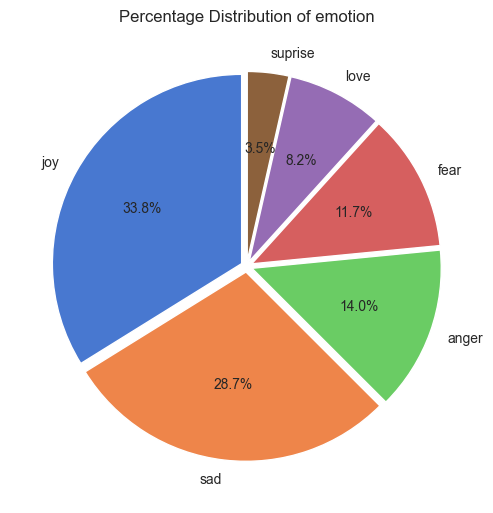

emotion
joy        143067
sad        121187
anger       59317
fear        49649
love        34554
suprise     14972
Name: count, dtype: int64


In [49]:
plot_categorical_distributions(columns_categorical=['emotion'], data=df_em_clean)

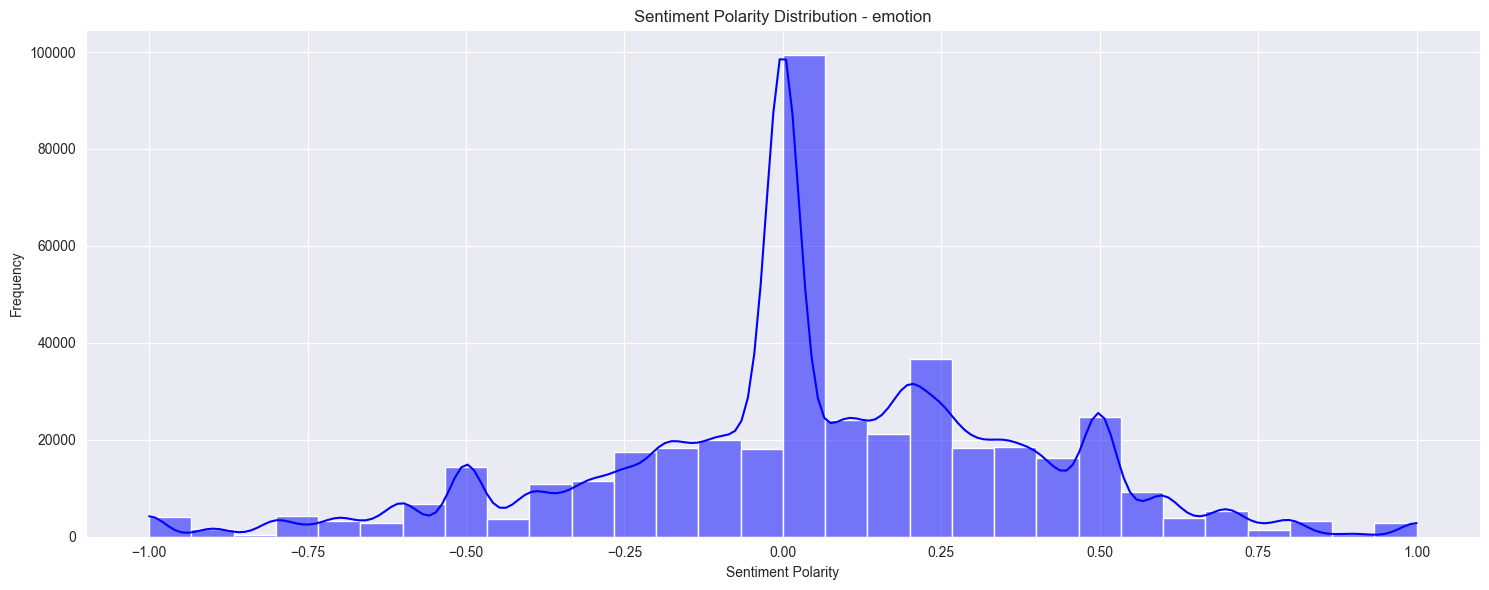

In [50]:
plot_sentiment_distribution(data=df_em_clean, text_column='sentence',df_name='emotion')

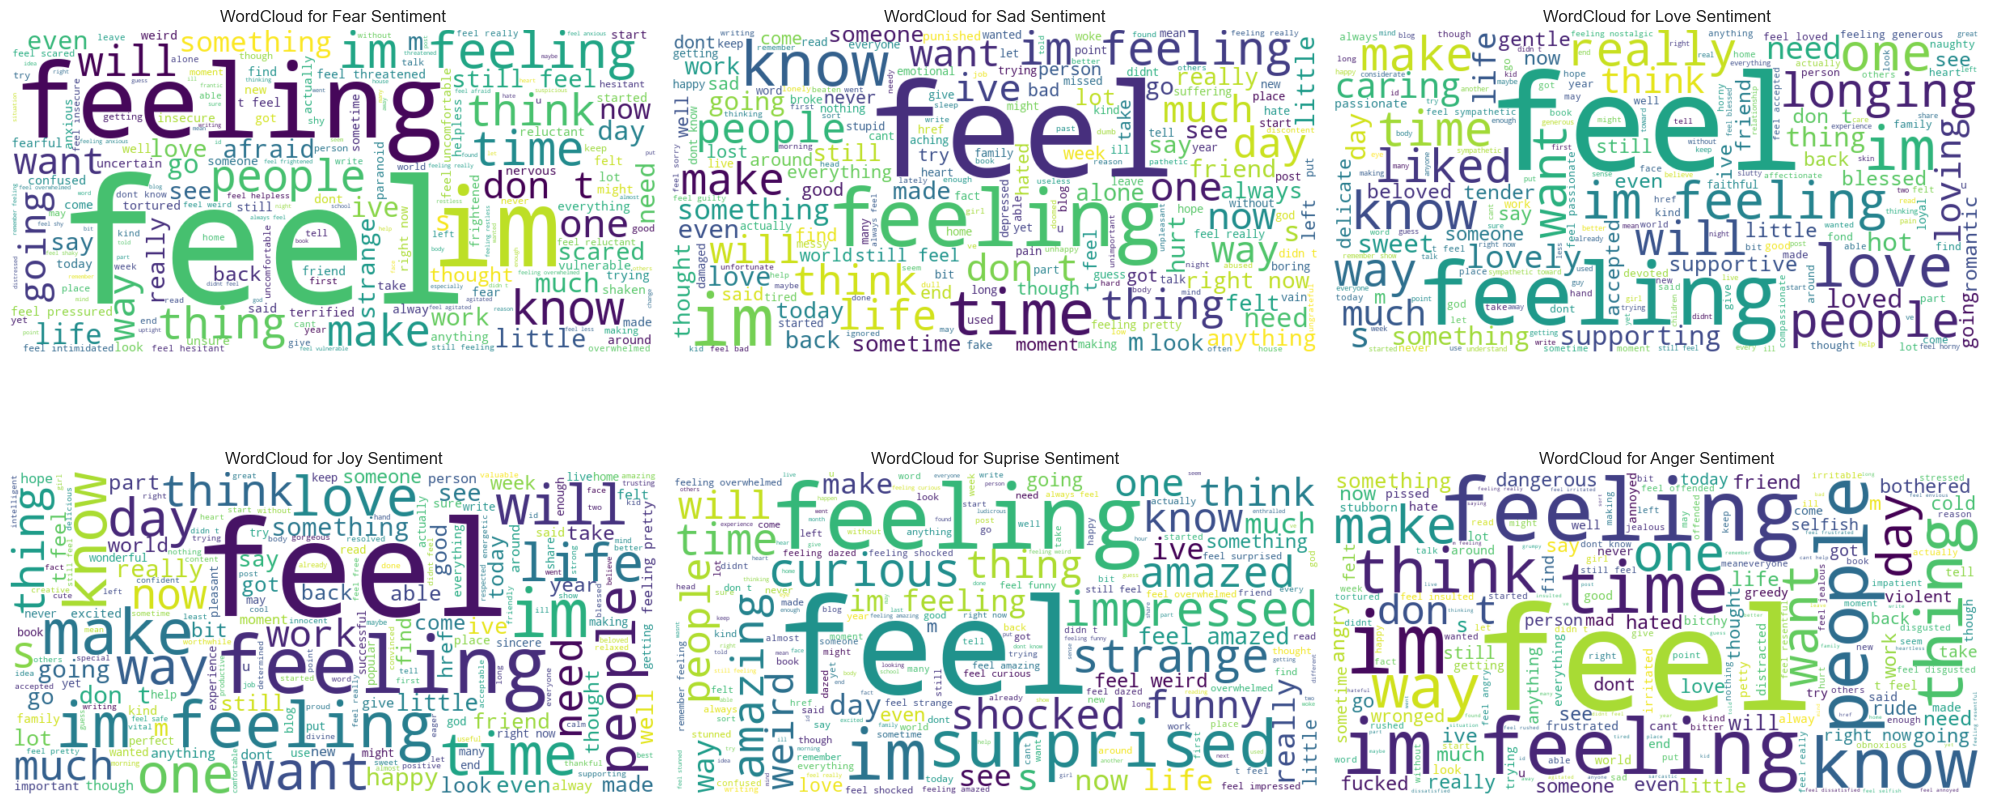

In [51]:
plot_wordcloud(df_em_clean, 'emotion', 'sentence')

In [52]:
vectorizer_path = "../save_emo_models/ml_emo_vectorizer.pkl"

In [53]:
opt_emo_summary_list = []
opt_emo_summary_list.clear()


=== logistic_regression ===
Best Params: OrderedDict([('C', 22.364202820542708)])

Comparison of Metrics Between Logistic Regression Models:


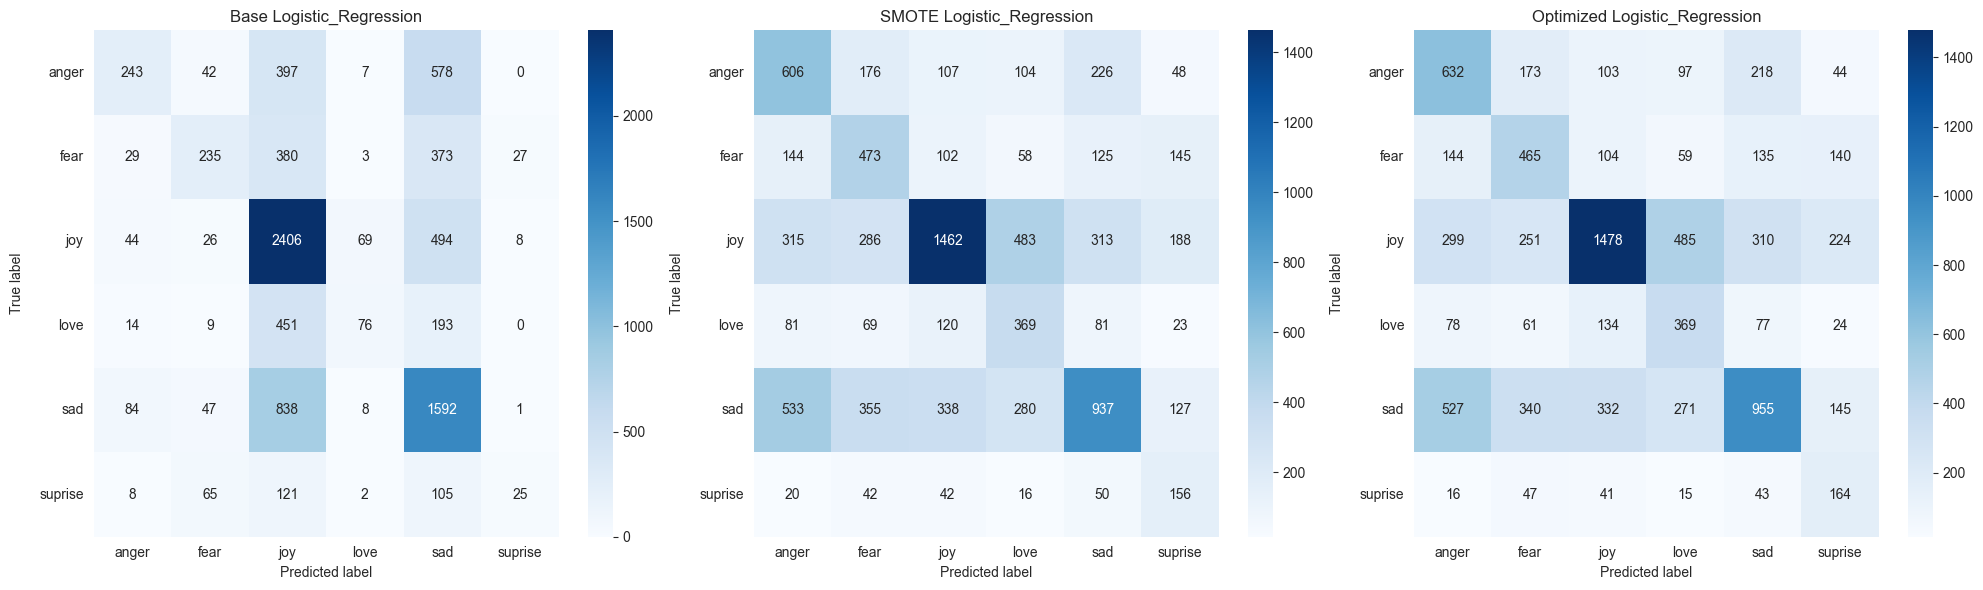

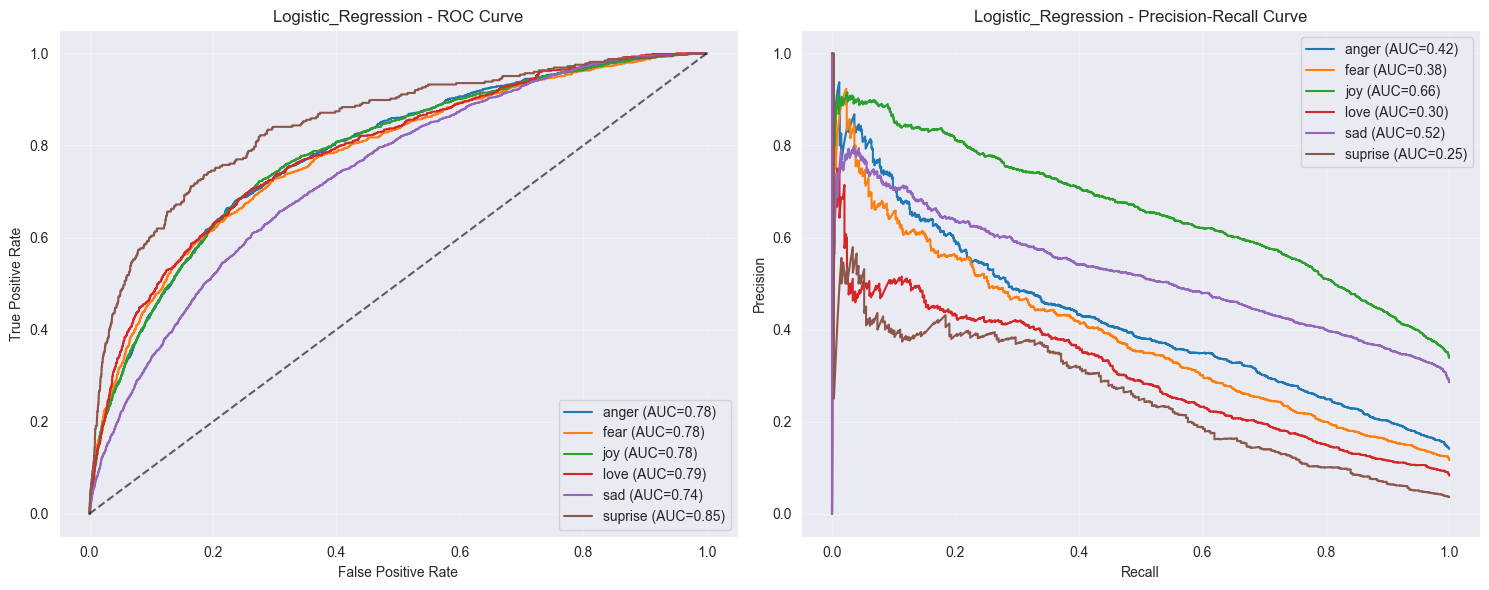

In [54]:
# === RUN END-TO-END ===
results, preds, best_model = run_ml_workflow(df_em_clean, "sentence",
                                             "emotion", "logistic_regression",
                                             vectorizer_path)
# Append the optimized summary
append_optimized_metrics(results, "logistic_regression", best_model, opt_emo_summary_list)

# Display summary
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between Logistic Regression Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

# Plot visualizations
plot_confusion_matrices(preds, "Logistic_Regression")
plot_training_metrics(preds, "Logistic_Regression")


=== naive_bayes ===
Best Params: OrderedDict([('alpha', 0.06610098295419149)])

Comparison of Metrics Between Naive Bayes Models:


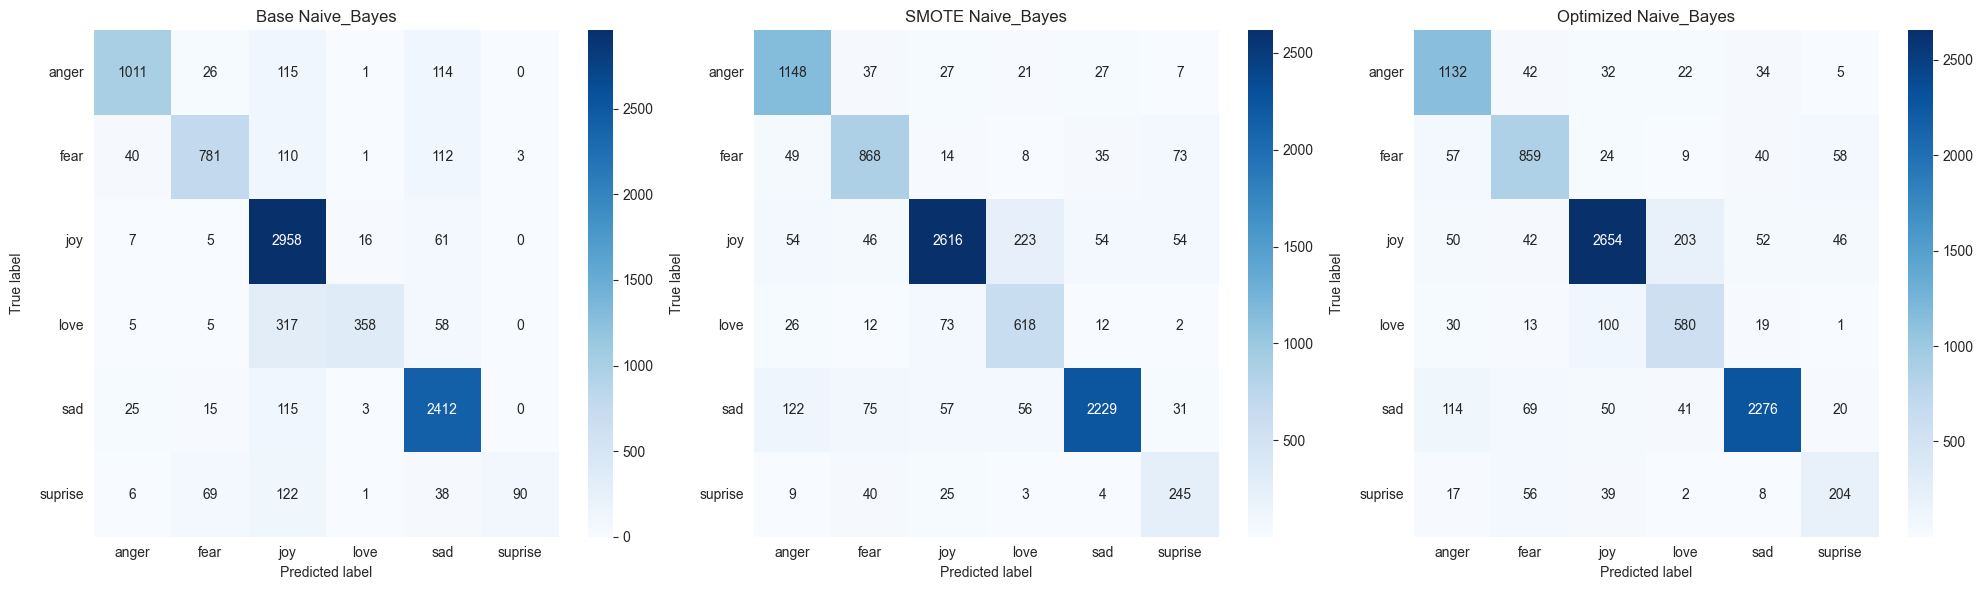

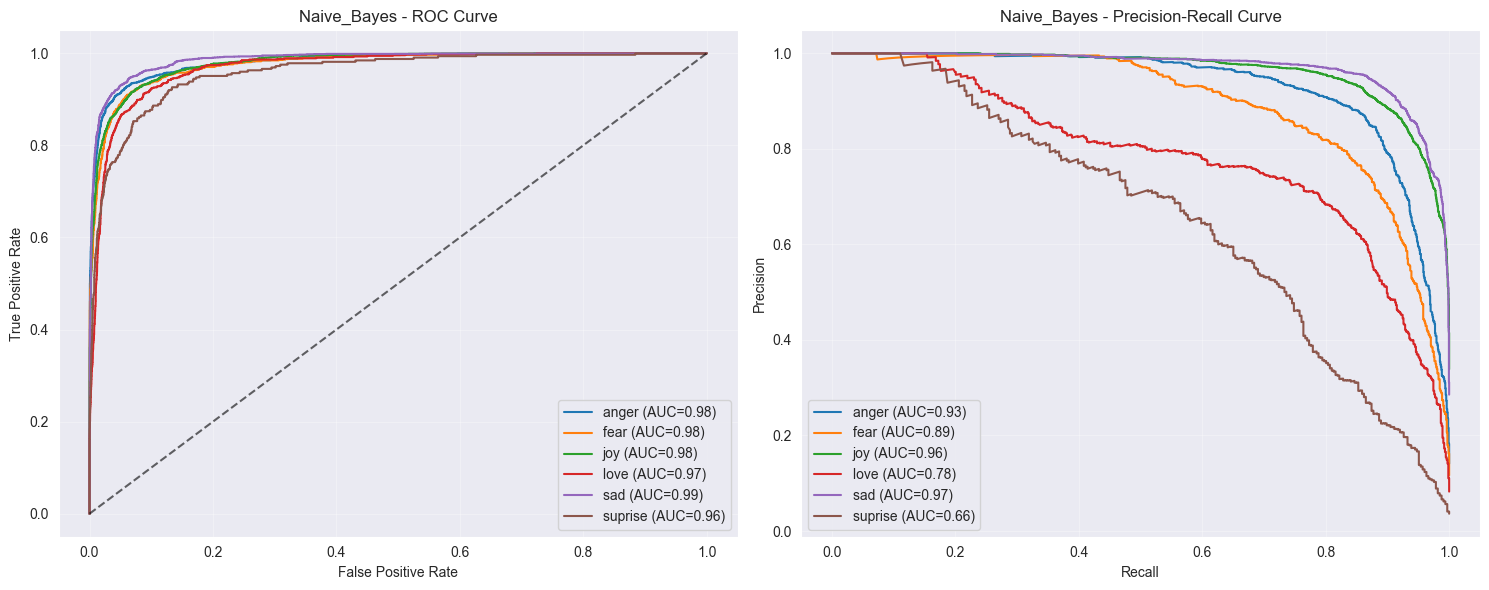

In [55]:
results, preds, best_model = run_ml_workflow(df_em_clean, "sentence",
                                             "emotion", "naive_bayes", vectorizer_path)
# Append the optimized summary
append_optimized_metrics(results, "naive_bayes", best_model, opt_emo_summary_list)

# Display the table
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between Naive Bayes Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

# Plot visualizations
plot_confusion_matrices(preds, "Naive_Bayes")
plot_training_metrics(preds, "Naive_Bayes")


=== random_forest ===
Best Params: OrderedDict([('max_depth', 13), ('n_estimators', 182)])

Comparison of Metrics Between Random Forest Models:


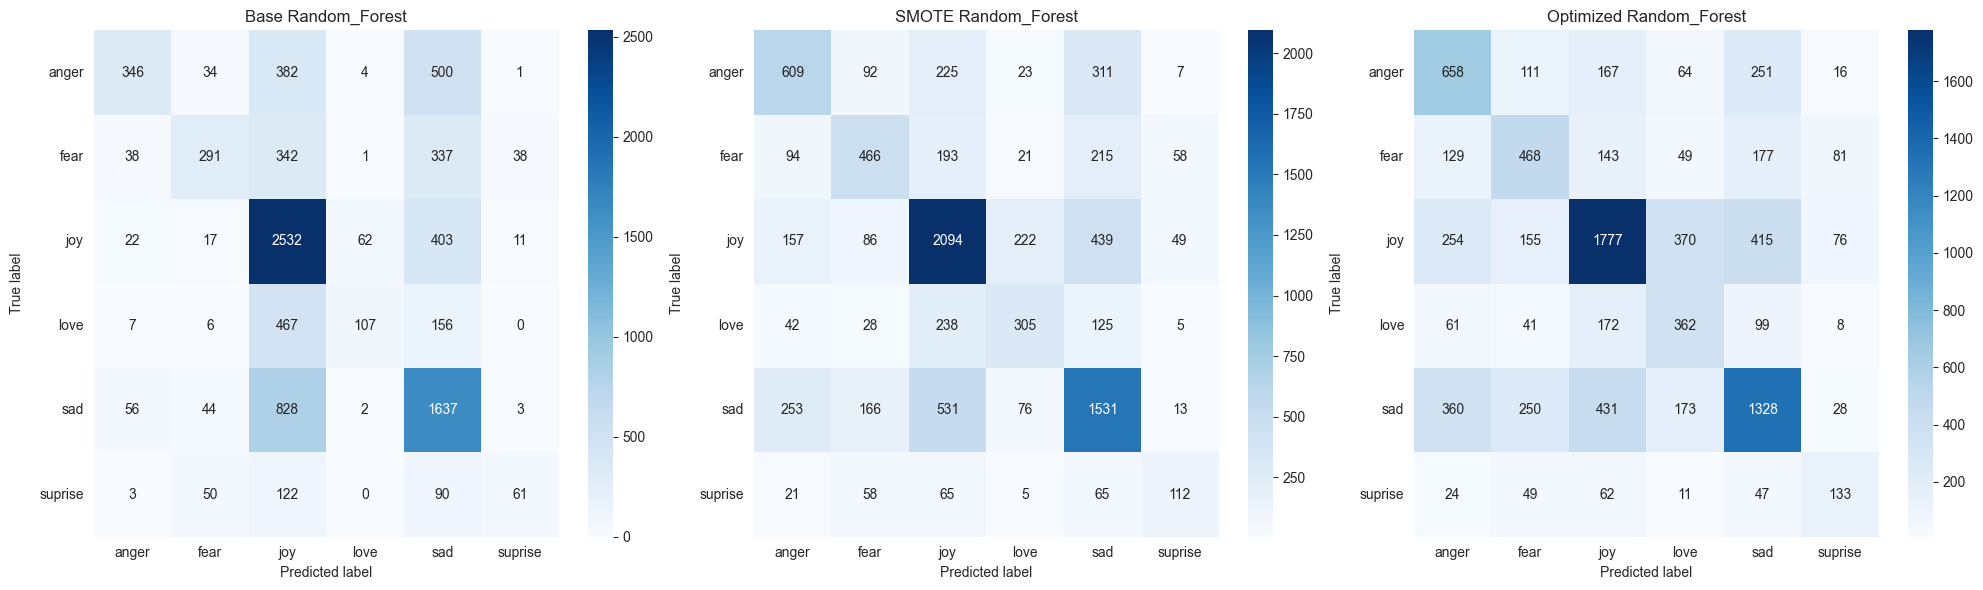

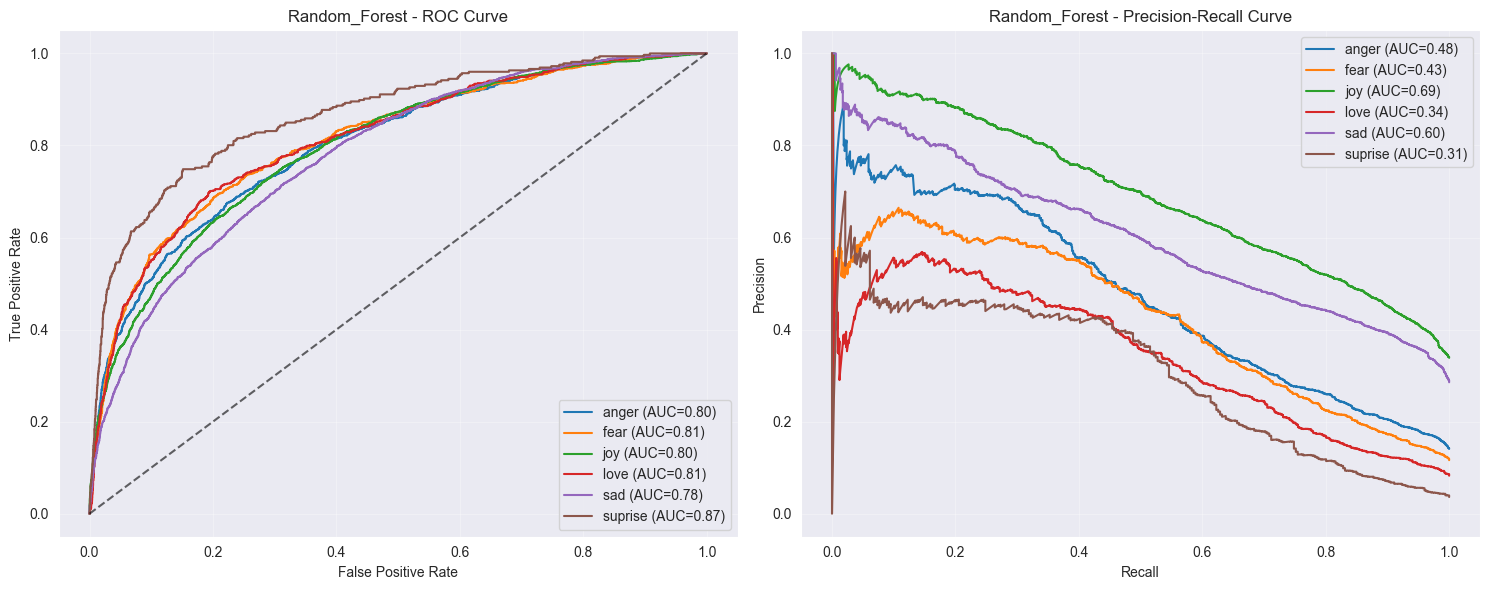

In [56]:
results, preds, best_model = run_ml_workflow(df_em_clean, "sentence",
                                             "emotion", "random_forest", vectorizer_path)
# Append the optimized summary
append_optimized_metrics(results, "random_forest", best_model, opt_emo_summary_list)

# Display the table
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between Random Forest Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

# Plot visualizations
plot_confusion_matrices(preds, "Random_Forest")
plot_training_metrics(preds, "Random_Forest")


=== xgboost ===


/Users/madeniji/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [20:20:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/madeniji/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [20:20:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/madeniji/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [20:22:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/madeniji/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [20:22:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

Best Params: OrderedDict([('learning_rate', 0.17255364529395611), ('max_depth', 7), ('n_estimators', 96)])

Comparison of Metrics Between XGBoost Models:


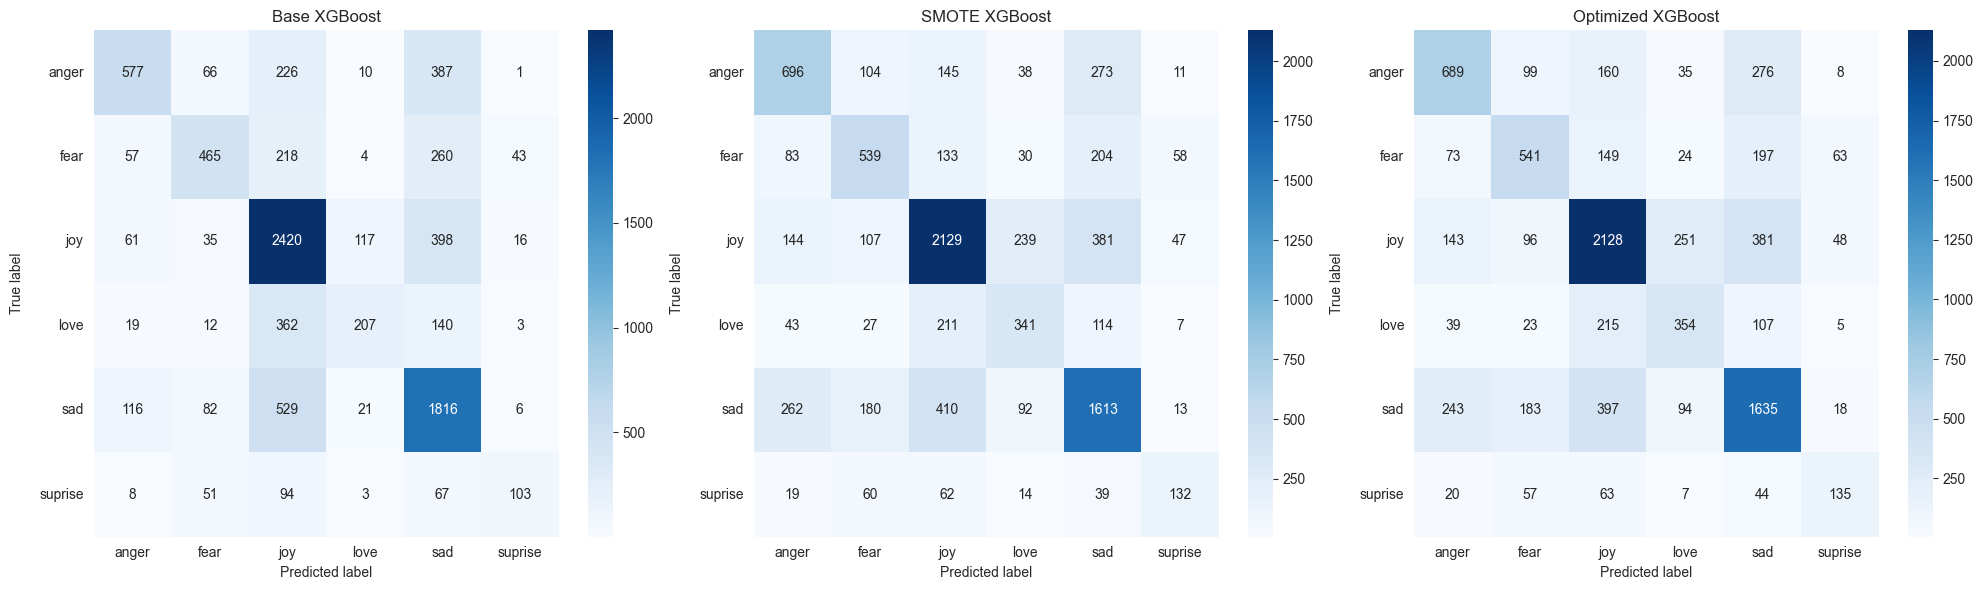

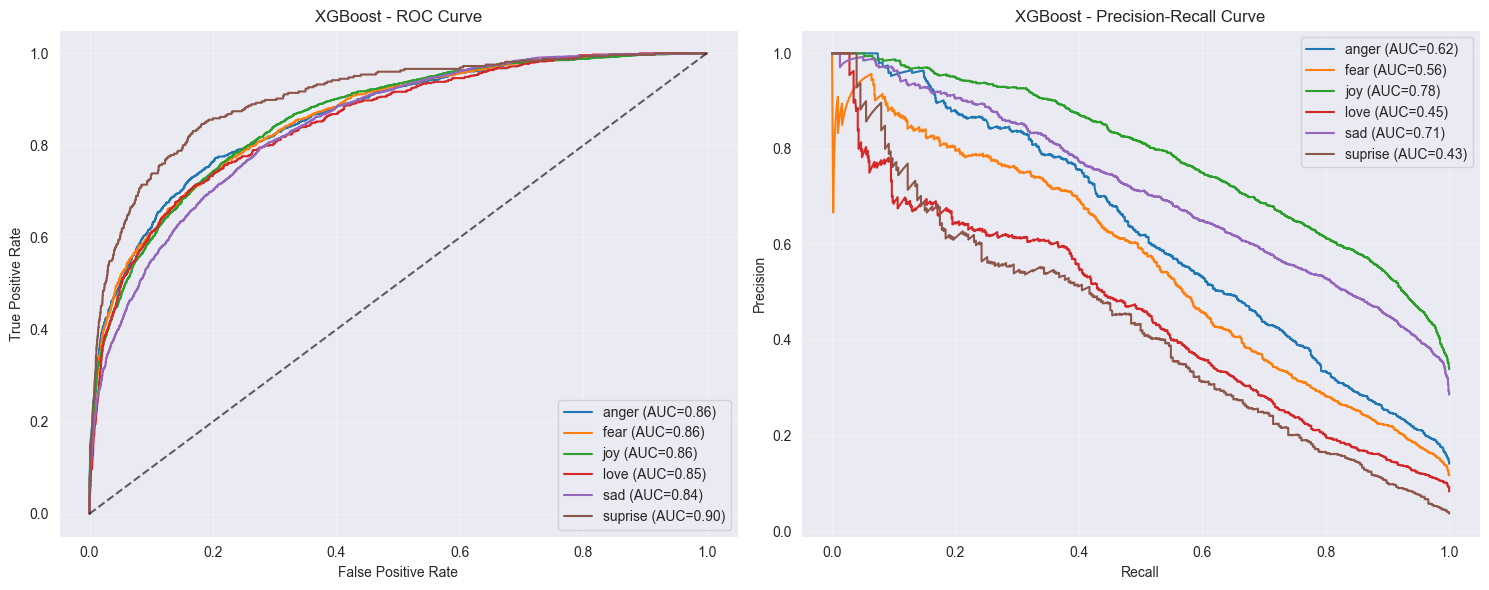

In [57]:
results, preds, best_model = run_ml_workflow(df_em_clean, "sentence",
                                             "emotion", "xgboost", vectorizer_path)
# Append the optimized summary
append_optimized_metrics(results, "xgboost", best_model, opt_emo_summary_list)

# Display the table
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between XGBoost Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

# Plot visualizations
plot_confusion_matrices(preds, "XGBoost")
plot_training_metrics(preds, "XGBoost")

## DEEP LEARNING MODEL

In [58]:
tokenizer_path = "../save_emo_models/dl_emo_tokenizer.pkl"

282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step

Comparison of Metrics Between LSTM Models:


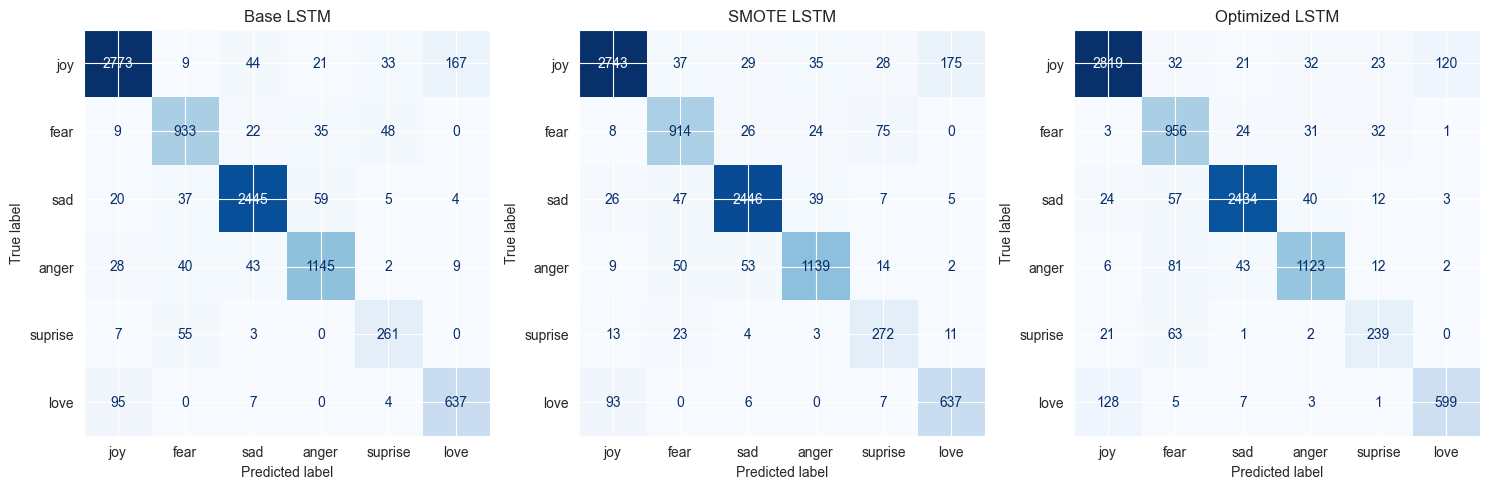

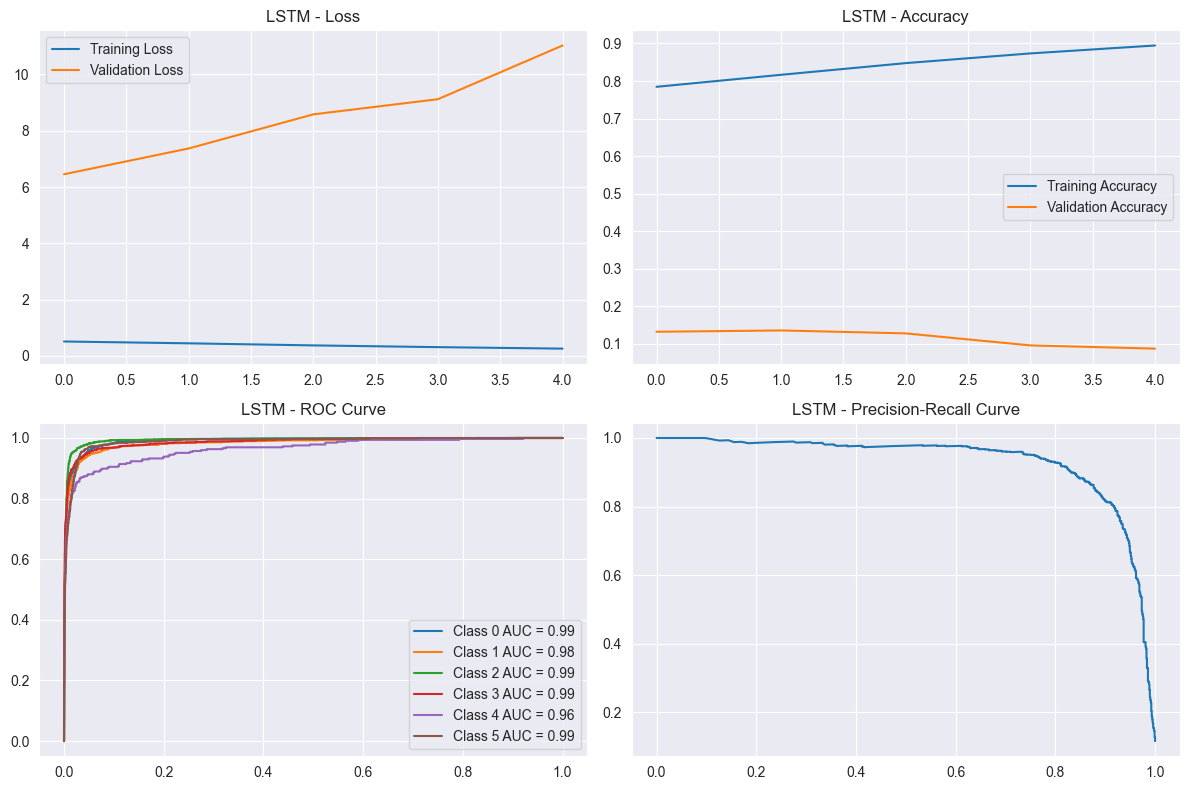

In [59]:
results, preds, opt_history = run_dl_workflow(df_em_clean, "sentence",
                                              "emotion", "LSTM", tokenizer_path)
# Append the optimized summary
append_optimized_metrics(results, "LSTM", opt_history, opt_emo_summary_list)

# Display the table
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between LSTM Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

# Plot visualizations
plot_dl_confusion_matrices(preds, "LSTM")
plot_dl_training_metrics(opt_history, preds, "LSTM")

282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

Comparison of Metrics Between GRU Models:


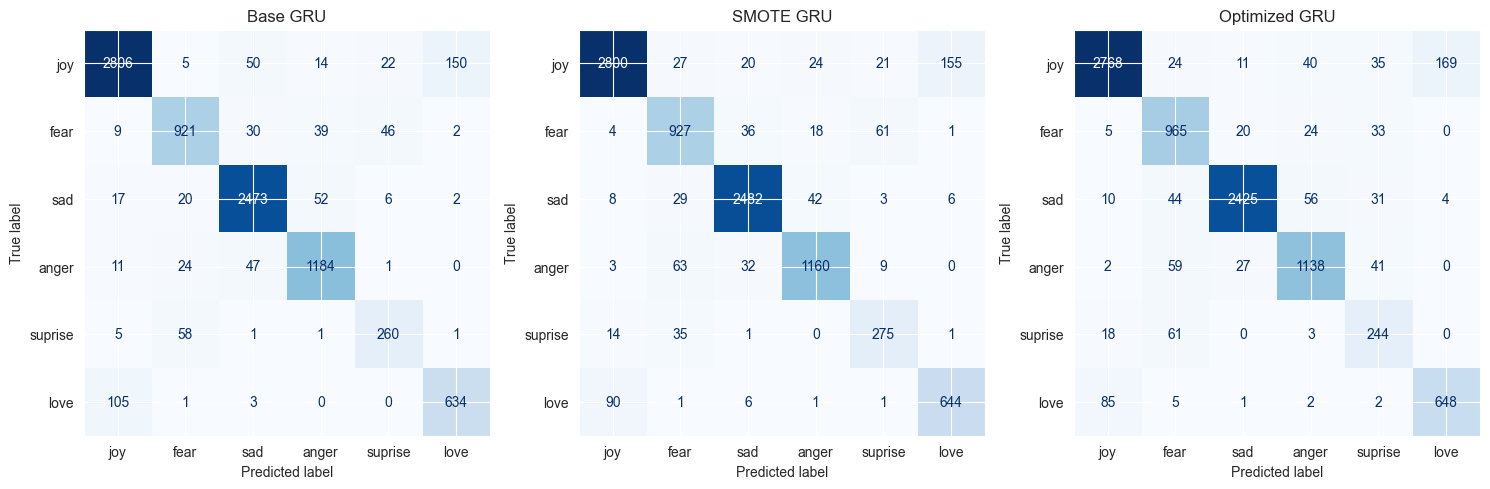

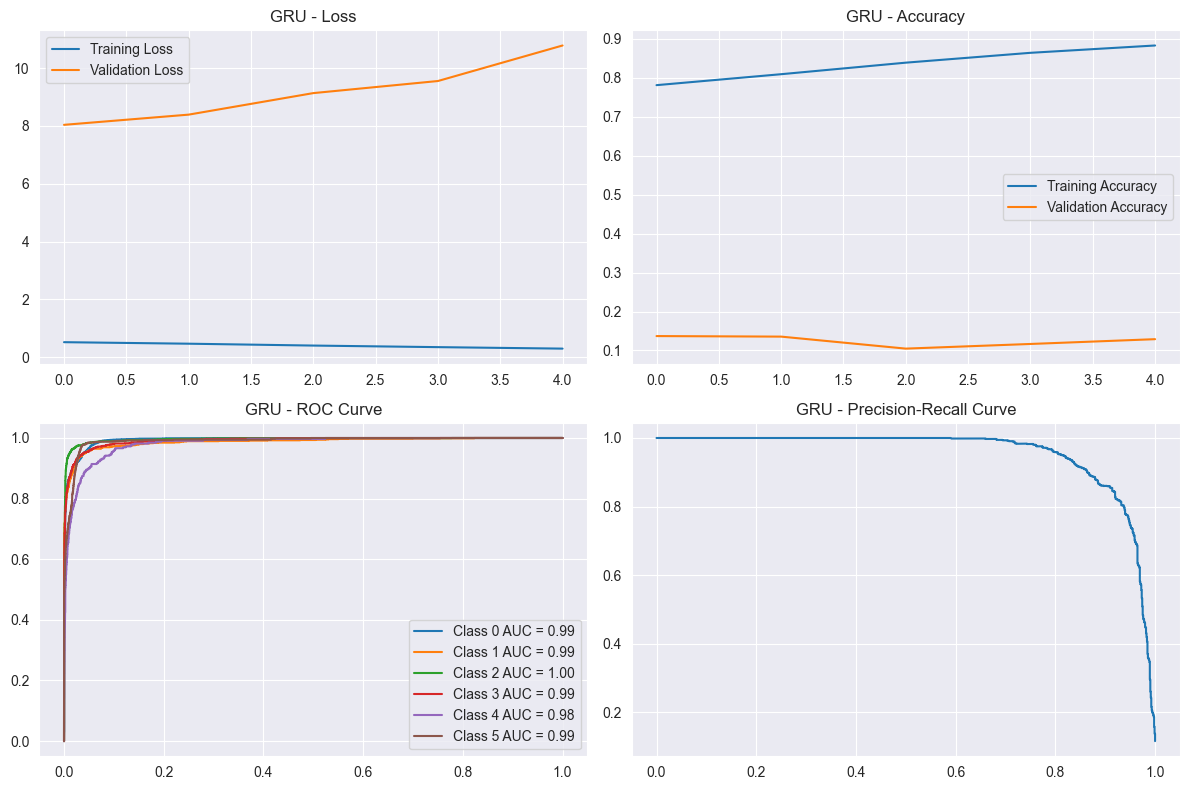

In [60]:
## DEEP LEARNING MODEL
results, preds, opt_history = run_dl_workflow(df_em_clean, "sentence",
                                              "emotion", "GRU", tokenizer_path)
# Append the optimized summary
append_optimized_metrics(results, "GRU", opt_history, opt_emo_summary_list)

# Display the table
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between GRU Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

# Plot visualizations
plot_dl_confusion_matrices(preds, "GRU")
plot_dl_training_metrics(opt_history, preds, "GRU")

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Comparison of Metrics Between CNN Models:


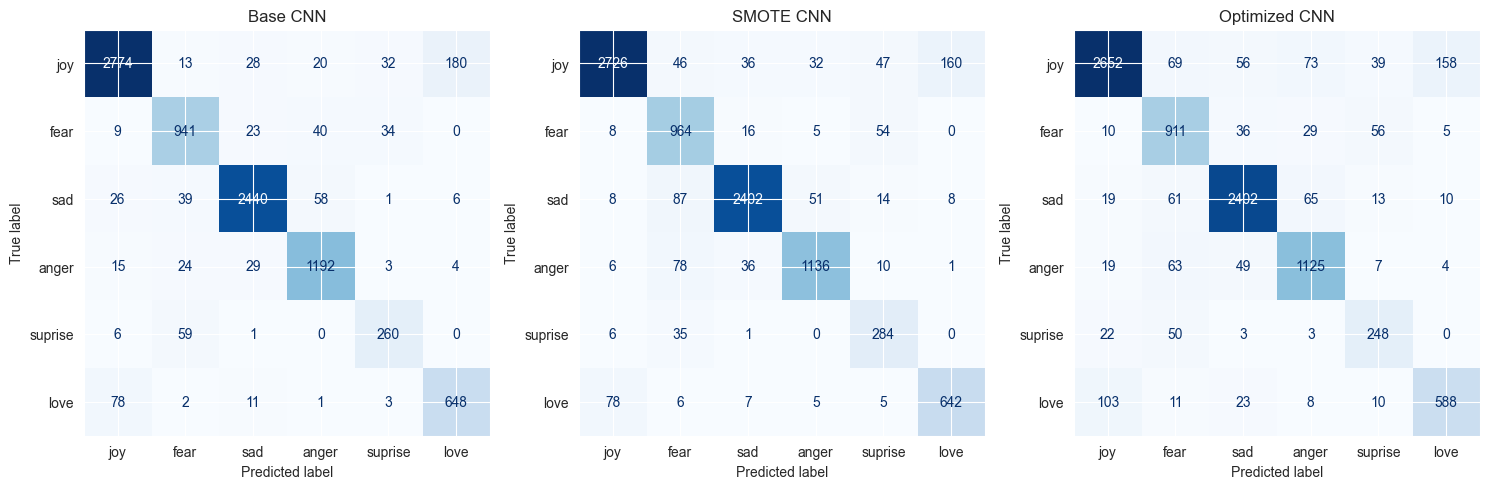

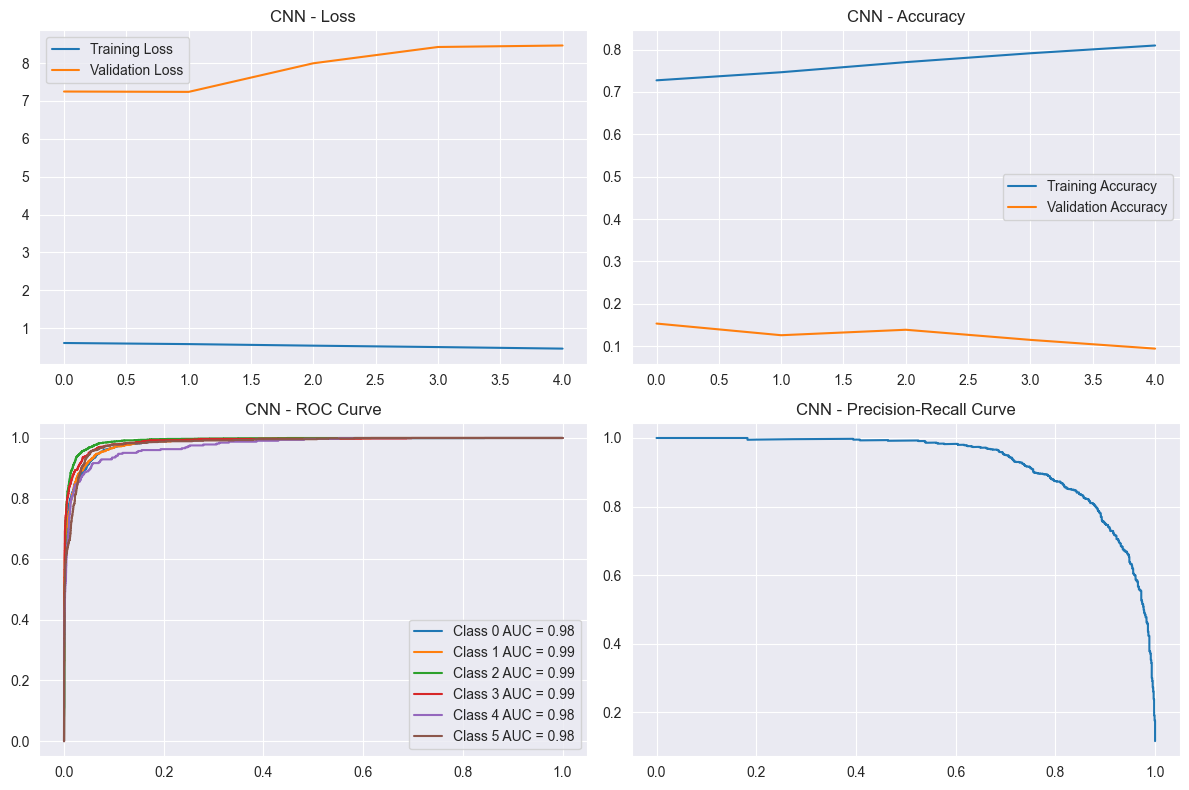

In [61]:
## DEEP LEARNING MODEL
results, preds, opt_history = run_dl_workflow(df_em_clean, "sentence",
                                              "emotion", "CNN", tokenizer_path)
# Append the optimized summary
append_optimized_metrics(results, "CNN", opt_history, opt_emo_summary_list)

# Display the table
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between CNN Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

# Plot visualizations
plot_dl_confusion_matrices(preds, "CNN")
plot_dl_training_metrics(opt_history, preds, "CNN")

In [62]:
opt_summary_df = pd.DataFrame(opt_emo_summary_list)

# # Sort by F1-Score in descending order
ranked_df = opt_summary_df.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)
ranked_df["Rank"] = ranked_df.index + 1           # rank column
df_rank = ranked_df.drop(columns=['Rank'], errors='ignore')

df_rank = df_rank.copy()

In [63]:
# Create directory if it doesn't exist
os.makedirs("../save_emo_models", exist_ok=True)

# Loop through all ranked models and save with position
for idx, row in df_rank.iterrows():
    model = row["Object"]
    model_name = row["Model"].lower().replace(" ", "_")  # sanitize name
    filename = f"emo_{idx+1}_{model_name}_model.pkl"
    filepath = os.path.join("../save_emo_models", filename)

    joblib.dump(model, filepath)
    print(f"Saved: {filename}")


Saved: emo_1_gru_model.pkl
Saved: emo_2_lstm_model.pkl
Saved: emo_3_cnn_model.pkl
Saved: emo_4_naive_bayes_model.pkl
Saved: emo_5_xgboost_model.pkl
Saved: emo_6_random_forest_model.pkl
Saved: emo_7_logistic_regression_model.pkl


In [ ]:
# Saved: emo_1_gru_model.pkl
# Saved: emo_2_lstm_model.pkl
# Saved: emo_3_cnn_model.pkl
# Saved: emo_4_naive_bayes_model.pkl
# Saved: emo_5_xgboost_model.pkl
# Saved: emo_6_random_forest_model.pkl
# Saved: emo_7_logistic_regression_model.pkl

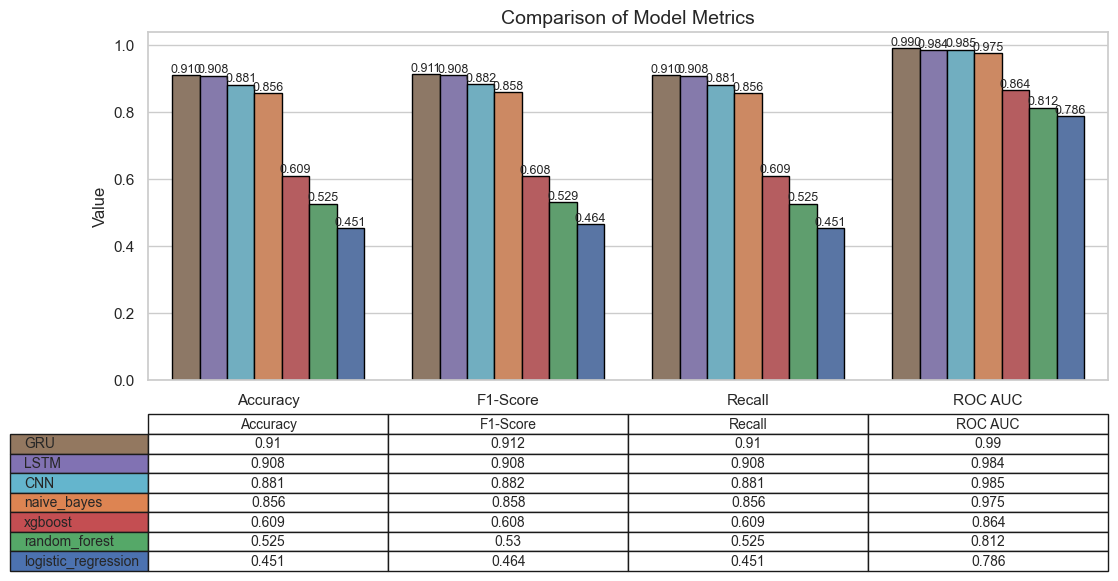

In [64]:
plot_model_comparison(df_rank)